循环神经网络的记忆能力实验
（Simple Recurrent Network，SRN）

In [25]:
# 数据集构建

import random
import numpy as np
import os

# 固定随机种子
random.seed(0)
np.random.seed(0)

def generate_data(length, k, save_path):
    if length < 3:
        raise ValueError("The length of data should be greater than 2.")
    if k==0:
        raise ValueError("k should be greater than 0.")
    # 生成100条长度为length的数字序列，除前两个字符外，序列其余数字暂用0填充
    base_examples = []
    for n1 in range(0, 10):
        for n2 in range(0 ,10):
            seq = [n1, n2] + [0] *(length - 2)
            label = n1 + n2
            base_examples.append((seq, label))
    
    examples = []
    # 数据增强：对base_examples中的每条数据，默认生成k条数据，放入examples
    for base_example in base_examples:
        for _ in range(k): 
            # for _ in range(n) 一般仅仅用于循环n次，不用设置变量，用 _ 指代临时变量，只在这个语句中使用一次
            # 随机生成替换的元素位置和元素
            idx = np.random.randint(2, length)
            val = np.random.randint(0, 10)
            # 对序列中的对应零元素进行替换
            seq = base_example[0].copy()
            label = base_example[1]
            seq[idx] = val
            examples.append((seq, label))
    
    # 保存增强后的数据
    with open(save_path, 'w', encoding='utf-8') as f:
        for example in examples:
            # 将数据转为字符串类型，方便保存
            seq = [str(e) for e in example[0]]
            label = str(example[1])
            line = " ".join(seq) + "\t" + label + "\n"
            f.write(line)

    print(f"generate_data to: {save_path}")

def create_path(path):
    if not os.path.isdir(path):
        os.makedirs(path)
    return path

path = os.getcwd()
path = path + '\RNN_Datasets'
create_path(path)

# 定义生成的数字序列长度
lengths = [5, 10, 15, 20, 25, 30, 35]
for length in lengths:
    # 生成长度为length的训练数据
    create_path(path + f"\{length}")
    path1 = create_path(path + f"\{length}")
    save_path = path1 + "\\train.txt"
    k = 3
    generate_data(length, k, save_path)
    # 生成长度为length的验证数据
    save_path = path1 + "\dev.txt"
    k = 1
    generate_data(length, k, save_path)
    # 生成长度为length的测试数据
    save_path = path1 + "\\test.txt"
    k = 1
    generate_data(length, k, save_path)


generate_data to: d:\VS Code\DeepLearning\RNN_Datasets\5\train.txt
generate_data to: d:\VS Code\DeepLearning\RNN_Datasets\5\dev.txt
generate_data to: d:\VS Code\DeepLearning\RNN_Datasets\5\test.txt
generate_data to: d:\VS Code\DeepLearning\RNN_Datasets\10\train.txt
generate_data to: d:\VS Code\DeepLearning\RNN_Datasets\10\dev.txt
generate_data to: d:\VS Code\DeepLearning\RNN_Datasets\10\test.txt
generate_data to: d:\VS Code\DeepLearning\RNN_Datasets\15\train.txt
generate_data to: d:\VS Code\DeepLearning\RNN_Datasets\15\dev.txt
generate_data to: d:\VS Code\DeepLearning\RNN_Datasets\15\test.txt
generate_data to: d:\VS Code\DeepLearning\RNN_Datasets\20\train.txt
generate_data to: d:\VS Code\DeepLearning\RNN_Datasets\20\dev.txt
generate_data to: d:\VS Code\DeepLearning\RNN_Datasets\20\test.txt
generate_data to: d:\VS Code\DeepLearning\RNN_Datasets\25\train.txt
generate_data to: d:\VS Code\DeepLearning\RNN_Datasets\25\dev.txt
generate_data to: d:\VS Code\DeepLearning\RNN_Datasets\25\test.tx

<>:55: DeprecationWarning: invalid escape sequence '\R'
<>:62: DeprecationWarning: invalid escape sequence '\{'
<>:63: DeprecationWarning: invalid escape sequence '\{'
<>:68: DeprecationWarning: invalid escape sequence '\d'
<>:55: DeprecationWarning: invalid escape sequence '\R'
<>:62: DeprecationWarning: invalid escape sequence '\{'
<>:63: DeprecationWarning: invalid escape sequence '\{'
<>:68: DeprecationWarning: invalid escape sequence '\d'
C:\Users\Dragon_Reed\AppData\Local\Temp\ipykernel_29972\3957777458.py:55: DeprecationWarning: invalid escape sequence '\R'
  path = path + '\RNN_Datasets'
C:\Users\Dragon_Reed\AppData\Local\Temp\ipykernel_29972\3957777458.py:62: DeprecationWarning: invalid escape sequence '\{'
  create_path(path + f"\{length}")
C:\Users\Dragon_Reed\AppData\Local\Temp\ipykernel_29972\3957777458.py:63: DeprecationWarning: invalid escape sequence '\{'
  path1 = create_path(path + f"\{length}")
C:\Users\Dragon_Reed\AppData\Local\Temp\ipykernel_29972\3957777458.py:68:

In [26]:
import os
# 加载数据
def load_data(data_path):
    # 加载训练集
    train_examples = []
    train_path = os.path.join(data_path, 'train.txt')
    with open(train_path, "r", encoding='utf-8') as f:
        for line in f.readlines():
            # 解析一行数据，将其处理为数字序列seq和标签label
            items = line.strip().split("\t") # 去除字符串两边的空格
            seq = [int(i) for i in items[0].split(" ")]
            label = int(items[1])
            train_examples.append((seq, label))
    
    # 加载验证集
    dev_examples = []
    dev_path = os.path.join(data_path, 'dev.txt')
    with open(dev_path, "r", encoding='utf-8') as f:
        for line in f.readlines():
            # 解析一行数据，将其处理为数字序列seq和标签label
            items = line.strip().split("\t")
            seq = [(int(i)) for i in items[0].split(" ")]
            label = int(items[1])
            dev_examples.append((seq, label))

    # 加载测试集
    test_examples = []
    test_path = os.path.join(data_path, "test.txt")
    with open(test_path, 'r', encoding='utf-8') as f:
        for line in f.readlines():
            # 解析一行数据，将其处理为数字序列seq和标签label
            items = line.strip().split("\t")
            seq = [(int(i)) for i in items[0].split(" ")]
            label = int(items[1])
            test_examples.append((seq, label))

    return train_examples, dev_examples, test_examples

# 设定加载的数据集的长度
length = 5
# 该长度的数据集的存放目录
data_path = f"./RNN_Datasets/{length}"
# 加载数据集
train_examples, dev_examples, test_examples = load_data(data_path)
print("dev example: ", dev_examples[:2])
print("训练集数量：", len(train_examples))
print("验证集数量：", len(dev_examples))
print("测试集数量：", len(test_examples))

dev example:  [([0, 0, 6, 0, 0], 0), ([0, 1, 0, 0, 8], 1)]
训练集数量： 300
验证集数量： 100
测试集数量： 100


In [27]:
import paddle
from paddle.io import Dataset

class DigitSumDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __getitem__(self, idx): # 函数__getitem__负责根据索引读取数据，并将数据转换为张量
        example = self.data[idx]
        seq = paddle.to_tensor(example[0], dtype='int64')
        label = paddle.to_tensor(example[1], dtype='int64')
        return seq, label
    
    def __len__(self):
        return len(self.data)

In [28]:
# 模型构建

# 基于索引方式的嵌入层的实现
import paddle
import paddle.nn as nn

class Embedding(nn.Layer):
    def __init__(self, num_embedding, embedding_dim, para_attr=paddle.ParamAttr(initializer=nn.initializer.XavierUniform())):
        super(Embedding, self).__init__()
        # 定义嵌入矩阵
        self.W = paddle.create_parameter(shape=[num_embedding, embedding_dim], dtype='float32', attr=para_attr)
    
    def forward(self, inputs):
        # 根据索引获取对应词向量
        embs = self.W[inputs]
        return embs
    
emb_layer = Embedding(10, 5)
inputs = paddle.to_tensor([0, 1, 2, 3])
emb_layer(inputs)

Tensor(shape=[4, 5], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [[-0.12769723,  0.02109766, -0.60092080,  0.55666131,  0.56396580],
        [ 0.37533861, -0.10749958,  0.40509656, -0.34273604,  0.51809174],
        [-0.48277014, -0.53730589, -0.11482737,  0.58194441, -0.36770758],
        [-0.38712329,  0.49450994, -0.07757898, -0.18090831,  0.05738779]])

In [29]:
import paddle
import paddle.nn as nn
import paddle.nn.functional as F

paddle.seed(0)

# SRN模型
class SRN(nn.Layer):
    def __init__(self, input_size, hidden_size, W_attr=None, U_attr=None, b_attr=None):
        super(SRN, self).__init__()
        # 嵌入向量的维度
        self.input_size = input_size
        # 隐状态的维度
        self.hidden_size = hidden_size
        # 定义模型参数W，其shape为 input_size x hidden_size
        self.W = paddle.create_parameter(shape=[input_size, hidden_size], dtype='float32', attr=W_attr)
        # 定义模型参数U，其shape为hidden_size x hidden_size
        self.U = paddle.create_parameter(shape=[hidden_size, hidden_size], dtype='float32', attr=U_attr)
        # 定义模型参数b，其shape为 1 x hidden_size
        self.b = paddle.create_parameter(shape=[1, hidden_size], dtype="float32", attr=b_attr)

    # 初始化向量
    def init_state(self, batch_size):
        hidden_state = paddle.zeros(shape=[batch_size, self.hidden_size], dtype="float32")
        return hidden_state
    
    # 定义前向计算
    def forward(self, inputs, hidden_state=None):
        # inputs: 输入数据, 其shape为batch_size x seq_len x input_size
        batch_size, seq_len, input_size = inputs.shape
        # 初始化起始状态的隐向量, 其shape为 batch_size x hidden_size
        if hidden_state is None:
            hidden_state = self.init_state(batch_size)

        # 循环执行RNN计算
        for step in range(seq_len):
            # 获取当前时刻的输入数据step_input, 其shape为 batch_size x input_size
            step_input = inputs[:, step, :]
            # print(step_input)
            # 获取当前时刻的隐状态向量hidden_state, 其shape为 batch_size x hidden_size
            hidden_state = F.tanh(paddle.matmul(step_input, self.W) + paddle.matmul(hidden_state, self.U) + self.b)
        return hidden_state

In [30]:
# 初始化参数并运行
W_attr = paddle.ParamAttr(initializer=nn.initializer.Assign([[0.1, 0.2], [0.1, 0.2]]))
U_attr = paddle.ParamAttr(initializer=nn.initializer.Assign([[0.0, 0.1], [0.1, 0.0]]))
b_attr = paddle.ParamAttr(initializer=nn.initializer.Assign([[0.1, 0.1]]))

srn = SRN(2, 2, W_attr=W_attr, U_attr=U_attr, b_attr=b_attr)

inputs = paddle.to_tensor([[[1, 0], [0, 2]]], dtype="float32")
hidden_state = srn(inputs)
print("hidden_state", hidden_state)

hidden_state Tensor(shape=[1, 2], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [[0.31773993, 0.47749743]])


In [31]:
# 飞桨框架已经内置了SRN的API paddle.nn.SimpleRNN
# 这里创建一个随机数组作为测试数据，数据shape为batch_size x seq_len x input_size
batch_size, seq_len, input_size = 8, 20, 32
inputs = paddle.randn(shape=[batch_size, seq_len, input_size])

# 设置模型的hidden_size
hidden_size = 32
paddle_srn = nn.SimpleRNN(input_size=input_size, hidden_size=hidden_size)
self_srn = SRN(input_size=input_size, hidden_size=hidden_size)

self_hidden_state = self_srn(inputs)
paddle_outputs, paddle_hidden_state = paddle_srn(inputs)

print("self_srn hidden_state:", self_hidden_state.shape)
print("paddle_srn outputs:", paddle_outputs.shape)
print("paddle_srn hidden_state:", paddle_hidden_state.shape)
# 自己实现的SRN由于没有考虑多层因素，因此没有层次这个维度，因此其输出shape为[8, 32]。
# 同时由于在以上代码使用Paddle内置API实例化SRN时，默认定义的是1层的单向SRN，因此其shape为[1, 8, 32]，同时隐状态向量为[8,20, 32].

self_srn hidden_state: [8, 32]
paddle_srn outputs: [8, 20, 32]
paddle_srn hidden_state: [1, 8, 32]


In [32]:
paddle.seed(0)

# 这里创建一个随机数组作为测试数据，数据shape为batch_size x seq_len x input_size
batch_size, seq_len, input_size, hidden_size = 2, 5, 10, 10
inputs = paddle.randn(shape=[batch_size, seq_len, input_size])

# 设置模型的hidden_size
bx_attr = paddle.ParamAttr(initializer=nn.initializer.Assign(paddle.zeros([hidden_size, ])))
paddle_srn = nn.SimpleRNN(input_size, hidden_size, bias_ih_attr=bx_attr)

# 获取paddle_srn中的参数，并设置相应的paramAttr,用于初始化SRN
W_attr = paddle.ParamAttr(initializer=nn.initializer.Assign(paddle_srn.weight_ih_l0.T))
U_attr = paddle.ParamAttr(initializer=nn.initializer.Assign(paddle_srn.weight_hh_l0.T))
b_attr = paddle.ParamAttr(initializer=nn.initializer.Assign(paddle_srn.bias_hh_l0))
self_srn = SRN(input_size, hidden_size, W_attr=W_attr, U_attr=U_attr, b_attr=b_attr)

# 进行前向计算，获取隐状态向量，并打印展示
self_hidden_state = self_srn(inputs)
paddle_outputs, paddle_hidden_state = paddle_srn(inputs)
print("paddle SRN:\n", paddle_hidden_state.numpy().squeeze(0))
print("self SRN:\n", self_hidden_state.numpy())

paddle SRN:
 [[-0.52240175 -0.6713908   0.65631855  0.64089334 -0.3876272  -0.3769632
   0.4645546   0.44771266 -0.44304743  0.596488  ]
 [ 0.57298964 -0.01333205  0.06296476  0.18045224  0.3787189  -0.47058076
  -0.28836593  0.45750874 -0.26558053 -0.37276578]]
self SRN:
 [[-0.5224017  -0.6713909   0.65631866  0.64089334 -0.3876272  -0.3769632
   0.46455455  0.44771266 -0.44304746  0.596488  ]
 [ 0.57298946 -0.01333205  0.0629647   0.18045224  0.3787189  -0.47058076
  -0.28836593  0.4575087  -0.26558053 -0.37276578]]


In [33]:
import time 
# 这里创建一个随机数组作为测试数据，数据shape为batch_size x seq_len x input_size
batch_size, seq_len, input_size, hidden_size = 2, 5, 10, 10
inputs = paddle.randn(shape=[batch_size, seq_len, input_size])

# 实例化模型
self_srn = SRN(input_size=input_size, hidden_size=hidden_size)
paddle_srn = nn.SimpleRNN(input_size=input_size, hidden_size=hidden_size)

# 计算自己实现的SRN运算速度
model_time = 0
for i in range(100):
    start_time = time.time()
    out = self_srn(inputs)
    # 预热10次运算，不计入最终速度统计
    if i<10:
        continue
    end_time = time.time()
    model_time += (end_time - start_time)
avg_model_time = model_time/90
print('self_srn speed:', avg_model_time, 's')

# 计算Paddle内置的SRN运算速度
model_time = 0
for i in range(100):
    start_time = time.time()
    out = paddle_srn(inputs)
    # 预热10次运算，不计入最终速度统计
    if i<10:
        continue
    end_time = time.time()
    model_time += (end_time - start_time)
avg_model_time = model_time/90
print('paddle_srn speed:', avg_model_time, 's')

self_srn speed: 0.0007261594136555989 s
paddle_srn speed: 0.00022179815504286024 s


In [34]:
# 基于RNN实现数字预测的模型
class Model_RNN4SeqClass(nn.Layer):
    def __init__(self, model, num_digits, input_size, hidden_size, num_classes):
        super(Model_RNN4SeqClass, self).__init__()
        # 传入实例化的RNN层，例如SRN
        self.rnn_model = model
        # 词典大小, 这里为10，即不同数字的数量
        self.num_digits = num_digits
        # 嵌入向量维度
        self.input_size = input_size
        # 定义Embedding层
        self.embedding = Embedding(num_digits, input_size)
        # 定义线性层
        self.linear = nn.Linear(hidden_size, num_classes)

    def forward(self, inputs):
        # 将数字序列映射为相应向量
        inputs_emb = self.embedding(inputs)
        # 调用RNN模型
        hidden_state = self.rnn_model(inputs_emb)
        # 使用最后一个时刻的状态进行数字预测
        logits = self.linear(hidden_state)
        return logits

# 实例化一个input_size为4， hidden_size为5的SRN
srn = SRN(4, 5)
# 基于srn实例化一个数字预测模型实例
model = Model_RNN4SeqClass(model=srn, num_digits=10, input_size=4, hidden_size=5, num_classes=19)
# 生成一个shape为 2 x 3 的批次数据
inputs = paddle.to_tensor([[1,2,3], [2,3,4]])
# 进行模型前向预测
logits = model(inputs)
print(logits)

Tensor(shape=[2, 19], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [[ 0.22249472, -0.27267066, -0.11947216,  0.18512082,  0.23749369,
         -0.11689079, -0.20269598, -0.12036461, -0.12507632,  0.41154158,
          0.24305989,  0.31320760,  0.65083146, -0.05304531,  0.23425244,
         -0.52946305,  0.30384028,  0.09715621, -0.17917782],
        [ 0.11812171, -0.71218127, -0.31630632, -0.27226740,  0.12857485,
         -0.07123466, -0.17523380, -0.75248742, -0.52297723,  0.73723114,
          0.06157623, -0.12014663,  0.35055166,  0.26330370, -0.05449295,
          0.18273440, -0.10645686,  0.22770584,  0.22306524]])


In [35]:
# 模型训练
import os
import random
import paddle
import numpy as np
from nndl import Accuracy, RunnerV3

# 训练轮次
num_epochs = 500
# 学习率
lr = 0.001
# 输入数字的类别数
num_digits = 10
# 将数字映射为向量的维度
input_size = 32
# 隐状态向量的维度
hidden_size = 32
# 预测数字的类别数
num_classes = 19
# 批大小
batch_size = 8
# 模型保存目录
save_dir = "./checkpoints"

# 通过指定length进行不同长度数据的实验
def train(length):
    print(f"\n===> Training SRN with datda of length {length}.")
    # 固定随机种子
    np.random.seed(0)
    random.seed(0)
    paddle.seed(0)

    # 加载长度为length的数据
    data_path = f'./RNN_Datasets/{length}'
    train_examples, dev_examples, test_examples = load_data(data_path)
    train_set, dev_set, test_set = DigitSumDataset(train_examples), DigitSumDataset(dev_examples), DigitSumDataset(test_examples)
    train_loader = paddle.io.DataLoader(train_set, batch_size=batch_size)
    dev_loader = paddle.io.DataLoader(dev_set, batch_size=batch_size)
    test_loader = paddle.io.DataLoader(test_set, batch_size=batch_size)

    # 实例化模型
    base_model = SRN(input_size=input_size, hidden_size=hidden_size)
    model = Model_RNN4SeqClass(model=base_model, num_digits=num_digits, input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)

    # 指定优化器
    optimizer = paddle.optimizer.Adam(learning_rate=lr, parameters=model.parameters())
    # 定义评价指标
    metric = Accuracy()
    # 定义损失函数
    loss_fn = nn.CrossEntropyLoss()

    # 基于以上组件，实例化Runner
    runner = RunnerV3(model, optimizer, loss_fn, metric)

    # 进行模型训练
    model_save_path = os.path.join(save_dir, f"best_srn_model_{length}.pdparams")
    runner.train(train_loader, dev_loader, num_epochs=num_epochs, eval_steps=100, log_steps=100, save_path=model_save_path)

    return runner

In [36]:
# 多组训练

srn_runners = {}

lengths = [10, 15, 20, 25, 30, 35]
for length in lengths:
    runner = train(length)
    srn_runners[length] = runner


===> Training SRN with datda of length 10.
[Train] epoch: 0/500, step: 0/19000, loss: 2.98516
[Train] epoch: 2/500, step: 100/19000, loss: 2.59652
[Evaluate]  dev score: 0.12000, dev loss: 2.84987
[Evaluate] best accuracy performence has been updated: 0.00000 --> 0.12000
[Train] epoch: 5/500, step: 200/19000, loss: 2.26536
[Evaluate]  dev score: 0.07000, dev loss: 2.81978
[Train] epoch: 7/500, step: 300/19000, loss: 2.63965
[Evaluate]  dev score: 0.08000, dev loss: 2.78112
[Train] epoch: 10/500, step: 400/19000, loss: 2.47411
[Evaluate]  dev score: 0.09000, dev loss: 2.72431
[Train] epoch: 13/500, step: 500/19000, loss: 2.24435
[Evaluate]  dev score: 0.13000, dev loss: 2.59857
[Evaluate] best accuracy performence has been updated: 0.12000 --> 0.13000
[Train] epoch: 15/500, step: 600/19000, loss: 2.27838
[Evaluate]  dev score: 0.14000, dev loss: 2.45958
[Evaluate] best accuracy performence has been updated: 0.13000 --> 0.14000
[Train] epoch: 18/500, step: 700/19000, loss: 1.95722
[Eval

In [37]:
import matplotlib.pyplot as plt

def plot_training_loss(runner, fig_name, sample_step):
    plt.figure()
    train_items = runner.train_step_losses[::sample_step]
    train_steps=[x[0] for x in train_items]
    train_losses = [x[1] for x in train_items]
    plt.plot(train_steps, train_losses, color="#8E004D", label="Train loss")

    dev_steps = [x[0] for x in runner.dev_losses]
    dev_losses = [x[1] for x in runner.dev_losses]
    plt.plot(dev_steps, dev_losses, color="#E20079", linestyle='--', label="Dev loss")

    # 绘制坐标轴和图例
    plt.ylabel("loss", fontsize='x-large')
    plt.xlabel("step", fontsize='x-large')
    plt.legend(loc='upper right', fontsize='x-large')

    plt.savefig(fig_name)
    plt.show()

<>:4: DeprecationWarning: invalid escape sequence '\i'
<>:4: DeprecationWarning: invalid escape sequence '\i'
C:\Users\Dragon_Reed\AppData\Local\Temp\ipykernel_29972\3090831783.py:4: DeprecationWarning: invalid escape sequence '\i'
  path = path + '\images'
d:\anaconda3\lib\site-packages\fontTools\misc\py23.py:11: DeprecationWarning: The py23 module has been deprecated and will be removed in a future release. Please update your code.
  warnings.warn(


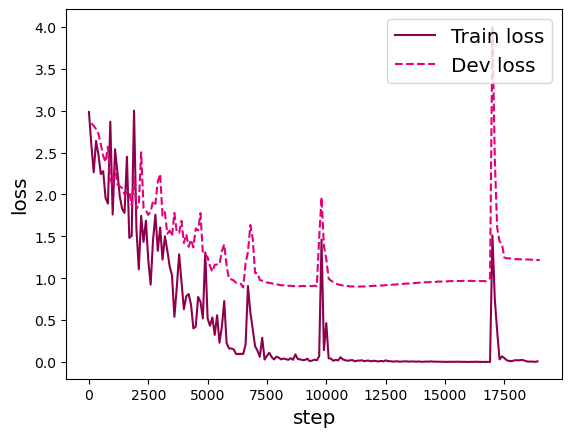

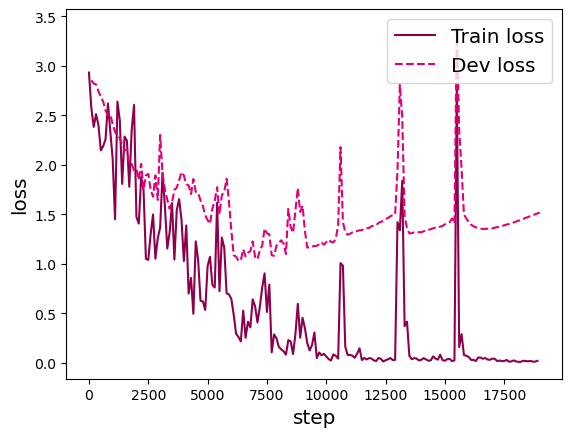

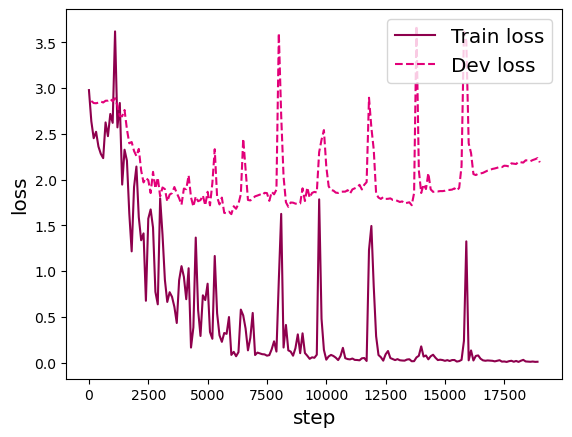

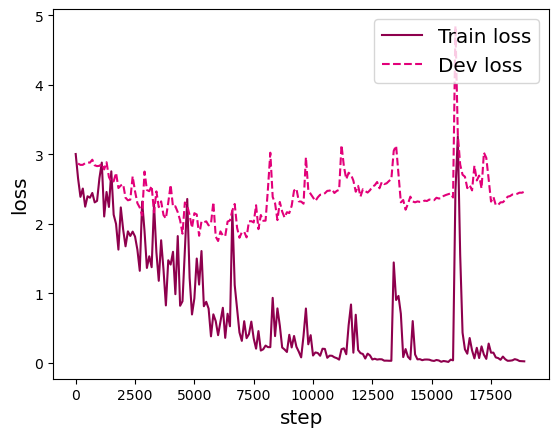

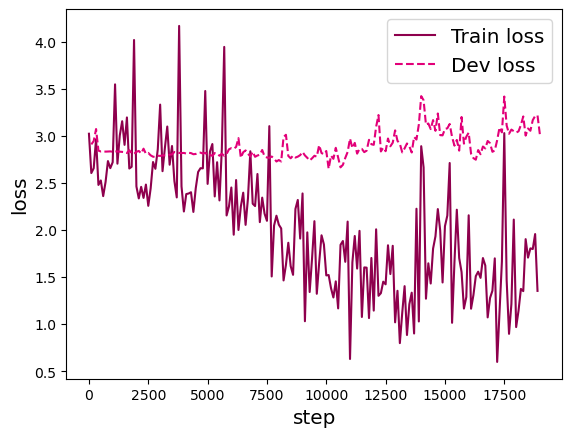

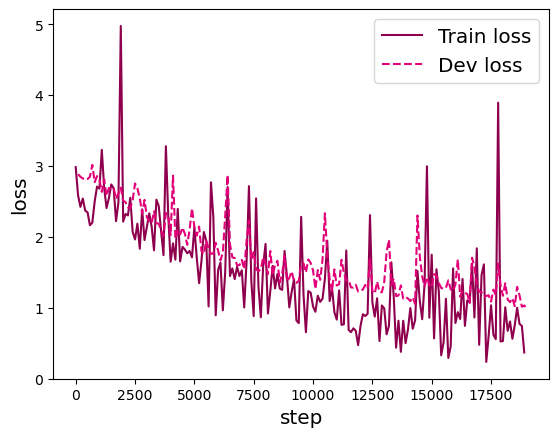

In [38]:
# 画出训练过程中的损失图

path = os.getcwd()
path = path + '\images'
create_path(path)

for length in lengths:
    runner = srn_runners[length]
    fig_name = f"./images/6.6_{length}.pdf"
    plot_training_loss(runner=runner, fig_name=fig_name, sample_step=100)

In [39]:
srn_dev_scores = []
srn_test_scores = []
for length in lengths:
    print(f"Evaluate SRN with data length {length}.")
    runner = srn_runners[length]
    # 加载训练过程中效果最好的模型
    model_path = os.path.join(save_dir, f"best_srn_model_{length}.pdparams")
    runner.load_model(model_path)

    # 加载长度为length的数据
    data_path = f"./RNN_Datasets/{length}"
    train_examples, dev_examples, test_examples = load_data(data_path)
    test_set = DigitSumDataset(test_examples)
    test_loader = paddle.io.DataLoader(test_set, batch_size=batch_size)

    # 使用测试集评价模型，获取测试集上的预测准确率
    score, _ = runner.evaluate(test_loader)
    srn_test_scores.append(score)
    srn_dev_scores.append(max(runner.dev_scores))

for length, dev_score, test_score in zip(lengths, srn_dev_scores, srn_test_scores):
    print(f"[SRN] length: {length}, dev_score: {dev_score}, test_score: {test_score:.5f}")

Evaluate SRN with data length 10.
Evaluate SRN with data length 15.
Evaluate SRN with data length 20.
Evaluate SRN with data length 25.
Evaluate SRN with data length 30.
Evaluate SRN with data length 35.
[SRN] length: 10, dev_score: 0.78, test_score: 0.75000
[SRN] length: 15, dev_score: 0.78, test_score: 0.78000
[SRN] length: 20, dev_score: 0.66, test_score: 0.59000
[SRN] length: 25, dev_score: 0.56, test_score: 0.53000
[SRN] length: 30, dev_score: 0.22, test_score: 0.19000
[SRN] length: 35, dev_score: 0.68, test_score: 0.64000


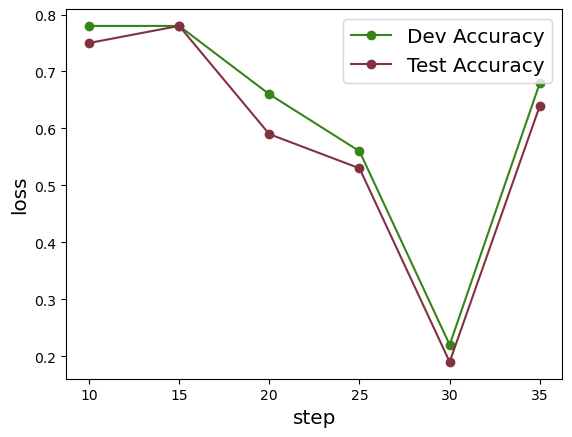

In [40]:
import matplotlib.pyplot as plt

plt.plot(lengths, srn_dev_scores, '-o', color="#378419", label='Dev Accuracy')
plt.plot(lengths, srn_test_scores, '-o', color='#823140', label='Test Accuracy')

# 绘制坐标轴和图例
plt.xlabel("step", fontsize='x-large')
plt.ylabel("loss", fontsize='x-large')

plt.legend(loc='upper right', fontsize='x-large')

fig_name = './images/6.7.pdf'
plt.savefig(fig_name)
plt.show()

 梯度爆炸实验

In [41]:
# 梯度打印函数
W_list = []
U_list = []
b_list = []

# 计算梯度范数
def custom_print_log(runner):
    model = runner.model
    W_grad_l2, U_grad_l2, b_grad_l2 = 0, 0, 0
    for name, param in model.named_parameters():
        if name == 'rnn_model.W':
            W_grad_l2 = paddle.norm(param.grad, p=2).numpy()[0]
        if name == 'rnn_model.U':
            U_grad_l2 = paddle.norm(param.grad, p=2).numpy()[0]
        if name == 'rnn_model.b':
            b_grad_l2 = paddle.norm(param.grad, p=2).numpy()[0]
    print(f"[Training] W_grad_l2: {W_grad_l2:.5f}, U_grad_l2: {U_grad_l2:.5f}, b_grad_l2: {b_grad_l2:.5f}")
    W_list.append(W_grad_l2)
    U_list.append(U_grad_l2)
    b_list.append(b_grad_l2)

In [42]:
# 复现梯度爆炸现象
import os
import random
import paddle
import numpy as np

np.random.seed(0)
random.seed(0)
paddle.seed(0)

# 训练轮次
num_epochs = 50
# 学习率
lr = 0.2
# 输入数字的类别数
num_digits = 10
# 将数字映射为向量的维度
input_size = 32
# 隐状态向量的维度
hidden_size = 32
# 模型保存目录
save_dir = './checkpoints'

# 可以设置不同的length进行不同长度数据的预测实验
length = 20
print(f"\n ===> Traning SRN with data of length {length}.")

# 加载长度为length的数据
data_path = f'./RNN_Datasets/{length}'
train_examples, dev_examples, test_examples = load_data(data_path)
train_set, dev_set, test_set = DigitSumDataset(train_examples), DigitSumDataset(train_examples), DigitSumDataset(test_examples)
train_loader = paddle.io.DataLoader(train_set, batch_size=batch_size)
dev_loader = paddle.io.DataLoader(dev_set, batch_size=batch_size)
test_loader = paddle.io.DataLoader(test_set, batch_size=batch_size)

# 实例化模型
base_model = SRN(input_size, hidden_size)
model = Model_RNN4SeqClass(model=base_model,num_digits=num_digits, input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)
# 指定优化器
optimizer = paddle.optimizer.SGD(learning_rate=lr, parameters=model.parameters())
# 定义评价指标
metric = Accuracy()
# 定义损失函数
loss_fn = nn.CrossEntropyLoss(reduction="sum")

# 基于以上组件，实例化Runner
runner = RunnerV3(model=model, optimizer=optimizer, loss_fn=loss_fn, metric=metric)

# 进行模型训练
model_save_path = os.path.join(save_dir, f"srn_explosion_model_{length}.pdparams")
runner.train(train_loader=train_loader, dev_loader=dev_loader, num_epochs=num_epochs, eval_steps=100,
             log_steps=1, save_path=model_save_path, custom_print_log=custom_print_log)


 ===> Traning SRN with data of length 20.
[Train] epoch: 0/50, step: 0/1900, loss: 23.81739
[Training] W_grad_l2: 10.75416, U_grad_l2: 23.57915, b_grad_l2: 9.86153
[Train] epoch: 0/50, step: 1/1900, loss: 26.21370
[Training] W_grad_l2: 10.47810, U_grad_l2: 21.49323, b_grad_l2: 5.34535
[Train] epoch: 0/50, step: 2/1900, loss: 24.61113
[Training] W_grad_l2: 29.00192, U_grad_l2: 59.83369, b_grad_l2: 13.08143
[Train] epoch: 0/50, step: 3/1900, loss: 111.52047
[Training] W_grad_l2: 0.71573, U_grad_l2: 0.83778, b_grad_l2: 0.14838
[Train] epoch: 0/50, step: 4/1900, loss: 141.18732
[Training] W_grad_l2: 5.04228, U_grad_l2: 5.88819, b_grad_l2: 1.04512
[Train] epoch: 0/50, step: 5/1900, loss: 150.18082
[Training] W_grad_l2: 4.97378, U_grad_l2: 12.08553, b_grad_l2: 2.15018
[Train] epoch: 0/50, step: 6/1900, loss: 273.85040
[Training] W_grad_l2: 17.11950, U_grad_l2: 19.65418, b_grad_l2: 3.51636
[Train] epoch: 0/50, step: 7/1900, loss: 160.44743
[Training] W_grad_l2: 16.37481, U_grad_l2: 20.71369,

images has been saved to:  ./images/6.8.pdf


C:\Users\Dragon_Reed\AppData\Local\Temp\ipykernel_29972\306469564.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(steps, W_list[:keep_steps], "r-", color="#321433", label='W_grad_l2')
C:\Users\Dragon_Reed\AppData\Local\Temp\ipykernel_29972\306469564.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(steps, U_list[:keep_steps], "r-", color='#388438', label='U_grad_l2')


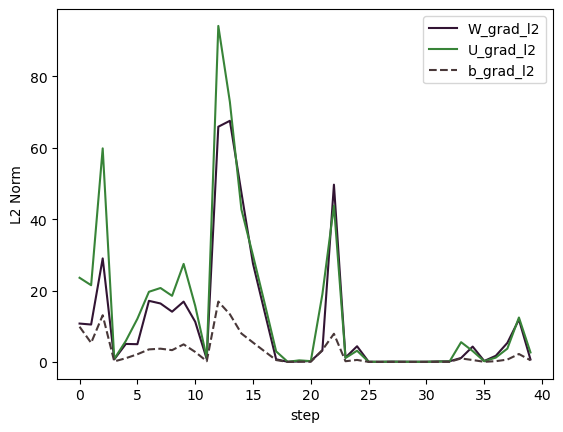

In [43]:
import matplotlib.pyplot as plt

def plot_grad(W_list, U_list, b_list, save_path, keep_steps=40):

    # 开始绘制图片
    plt.figure()
    # 默认保留前40步结果
    steps = list(range(keep_steps))
    plt.plot(steps, W_list[:keep_steps], "r-", color="#321433", label='W_grad_l2')
    plt.plot(steps, U_list[:keep_steps], "r-", color='#388438', label='U_grad_l2')
    plt.plot(steps, b_list[:keep_steps], '--', color='#493839', label='b_grad_l2')

    plt.xlabel("step")
    plt.ylabel("L2 Norm")
    plt.legend(loc="upper right")
    plt.savefig(save_path)
    print("images has been saved to: ", save_path)

save_path = f'./images/6.8.pdf'
plot_grad(W_list=W_list, U_list=U_list, b_list=b_list, save_path=save_path)

In [44]:
print(f"Evaluate SRN with data length {length}.")

# 加载训练过程中效果最好的模型
model_path = os.path.join(save_dir, f"srn_explosion_model_{length}.pdparams.")
runner.load_model(model_path)

# 使用测试集评价模型，获取测试集上的预测准确率
score, _ = runner.evaluate(test_loader)
print(f"[SRN] length:{length}, Score: {score:.5f}")

Evaluate SRN with data length 20.
[SRN] length:20, Score: 0.10000


In [45]:
# 使用梯度截断解决梯度爆炸问题

# 清空梯度列表
W_list.clear()
U_list.clear()
b_list.clear()

# 实例化模型
base_model = SRN(input_size=input_size, hidden_size=hidden_size)
model = Model_RNN4SeqClass(model=base_model, num_digits=num_digits,
                           input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)

# 定义clip，并实例化优化器
clip = nn.ClipGradByGlobalNorm(clip_norm=5.0)
optimizer = paddle.optimizer.SGD(learning_rate=lr, parameters=model.parameters(), grad_clip=clip)

# 定义评价指标
metric = Accuracy()

# 定义损失函数
loss_fn = nn.CrossEntropyLoss(reduction='sum')

# 实例化Runner
runner = RunnerV3(model=model, optimizer=optimizer, loss_fn=loss_fn, metric=metric)

# 训练模型
model_save_path = os.path.join(save_dir, f"srn_fix_explosion_model{length}.pdparams")
runner.train(train_loader=train_loader, dev_loader=dev_loader, num_epochs=num_epochs,
             eval_steps=100, log_steps=1, save_path=model_save_path, custom_print_log=custom_print_log)

[Train] epoch: 0/50, step: 0/1900, loss: 28.34687
[Training] W_grad_l2: 8.03688, U_grad_l2: 18.90691, b_grad_l2: 7.42098
[Train] epoch: 0/50, step: 1/1900, loss: 25.31087
[Training] W_grad_l2: 4.81566, U_grad_l2: 11.15534, b_grad_l2: 4.02030
[Train] epoch: 0/50, step: 2/1900, loss: 25.08764
[Training] W_grad_l2: 5.33437, U_grad_l2: 12.86519, b_grad_l2: 4.99398
[Train] epoch: 0/50, step: 3/1900, loss: 25.49576
[Training] W_grad_l2: 6.98962, U_grad_l2: 17.58939, b_grad_l2: 5.65333
[Train] epoch: 0/50, step: 4/1900, loss: 23.03881
[Training] W_grad_l2: 11.53216, U_grad_l2: 29.75361, b_grad_l2: 6.94818
[Train] epoch: 0/50, step: 5/1900, loss: 22.93986
[Training] W_grad_l2: 5.64317, U_grad_l2: 34.42931, b_grad_l2: 3.26497
[Train] epoch: 0/50, step: 6/1900, loss: 23.97862
[Training] W_grad_l2: 16.44911, U_grad_l2: 51.50824, b_grad_l2: 12.26121
[Train] epoch: 0/50, step: 7/1900, loss: 25.32927
[Training] W_grad_l2: 2.26236, U_grad_l2: 7.61132, b_grad_l2: 1.68538
[Train] epoch: 0/50, step: 8/1

C:\Users\Dragon_Reed\AppData\Local\Temp\ipykernel_29972\306469564.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(steps, W_list[:keep_steps], "r-", color="#321433", label='W_grad_l2')
C:\Users\Dragon_Reed\AppData\Local\Temp\ipykernel_29972\306469564.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(steps, U_list[:keep_steps], "r-", color='#388438', label='U_grad_l2')


images has been saved to:  ./images/6.9.pdf


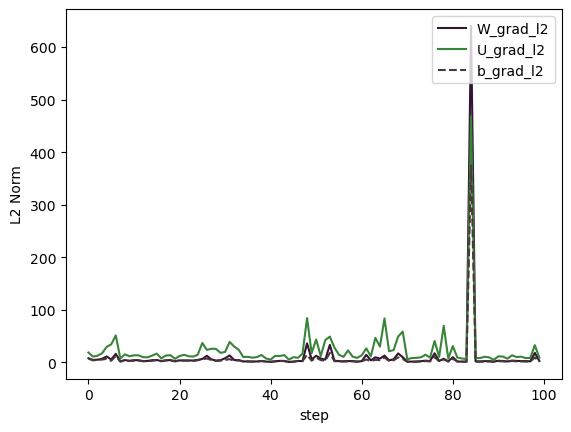

In [46]:
save_path = f"./images/6.9.pdf"
plot_grad(W_list, U_list, b_list, save_path, keep_steps=100)

In [47]:
print(f"Evaluate SRN with data length {length}.")

# 加载训练过程中效果最好的模型
model_path = os.path.join(save_dir, f"srn_fix_explosion_model{length}.pdparams")
runner.load_model(model_path)

# 使用测试集评价模型，获取测试集上的预测准确率
score, _ = runner.evaluate(test_loader)
print(f"[SRN] length:{length}, Score:{score:.5f}")

Evaluate SRN with data length 20.
[SRN] length:20, Score:0.12000


 LSTM的记忆能力实验

In [48]:
# 模型构建
# LSTM层

import paddle
import paddle.nn as nn
import paddle.nn.functional as F
# 声明LSTM和相关参数
class LSTM(nn.Layer):
    def __init__(self, input_size, hidden_size, Wi_attr=None, Wf_attr=None, Wo_attr=None, Wc_attr=None,
                 Ui_attr=None, Uf_attr=None, Uo_attr=None, Uc_attr=None, bi_attr=None, bf_attr=None, bo_attr=None, bc_attr=None):

        super(LSTM, self).__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size

        # 初始化模型参数
        self.W_i = paddle.create_parameter(shape=[input_size, hidden_size], dtype="float32", attr=Wi_attr)
        self.W_f = paddle.create_parameter(shape=[input_size, hidden_size], dtype="float32", attr=Wf_attr)
        self.W_o = paddle.create_parameter(shape=[input_size, hidden_size], dtype="float32", attr=Wo_attr)
        self.W_c = paddle.create_parameter(shape=[input_size, hidden_size], dtype="float32", attr=Wc_attr)
        self.U_i = paddle.create_parameter(shape=[hidden_size, hidden_size], dtype="float32", attr=Ui_attr)
        self.U_f = paddle.create_parameter(shape=[hidden_size, hidden_size], dtype="float32", attr=Uf_attr)
        self.U_o = paddle.create_parameter(shape=[hidden_size, hidden_size], dtype="float32", attr=Uo_attr)
        self.U_c = paddle.create_parameter(shape=[hidden_size, hidden_size], dtype="float32", attr=Uc_attr)
        self.b_i = paddle.create_parameter(shape=[1, hidden_size], dtype="float32", attr=bi_attr)
        self.b_f = paddle.create_parameter(shape=[1, hidden_size], dtype="float32", attr=bf_attr)
        self.b_o = paddle.create_parameter(shape=[1, hidden_size], dtype="float32", attr=bo_attr)
        self.b_c = paddle.create_parameter(shape=[1, hidden_size], dtype="float32", attr=bc_attr)

    # 初始化状态向量和隐状态向量
    def init_state(self, batch_size):
        hidden_state = paddle.zeros(shape=[batch_size, self.hidden_size], dtype="float32")
        cell_state = paddle.zeros(shape=[batch_size, self.hidden_size], dtype="float32")
        return hidden_state, cell_state
        
    # 定义前向计算
    def forward(self, inputs, states=None):
        # inputs: 输入数据，其shape为batch_size x seq_len x input_size
        batch_size, seq_len, input_size = inputs.shape

        # 初始化起始的单元状态和隐状态向量，其shape为batch_size x hidden_size，调用init_state进行初始化
        if states is None:
            states = self.init_state(batch_size)
        hidden_state, cell_state = states

        # 执行LSTM计算，包括：输入门、遗忘门和输出门、候选内部状态、内部状态和隐状态向量
        for step in range(seq_len):
            # 获取当前时刻的输入数据step_input: 其shape为batch_size x input_size
            step_input = inputs[:, step, :]
            # 计算输入门, 遗忘门和输出门, 其shape为：batch_size x hidden_size
            I_gate = F.sigmoid(paddle.matmul(step_input, self.W_i) + paddle.matmul(hidden_state, self.U_i) + self.b_i)
            F_gate = F.sigmoid(paddle.matmul(step_input, self.W_f) + paddle.matmul(hidden_state, self.U_f) + self.b_f)
            O_gate = F.sigmoid(paddle.matmul(step_input, self.W_o) + paddle.matmul(hidden_state, self.U_o) + self.b_o)
            # 计算候选状态向量, 其shape为：batch_size x hidden_size
            C_tilde = F.tanh(paddle.matmul(step_input, self.W_c) + paddle.matmul(hidden_state, self.U_c) + self.b_c)
            # 计算单元状态向量, 其shape为：batch_size x hidden_size
            cell_state = F_gate * cell_state + I_gate * C_tilde
            # 计算隐状态向量，其shape为：batch_size x hidden_size
            hidden_state = O_gate * F.tanh(cell_state)
        return hidden_state

In [49]:
Wi_attr = paddle.ParamAttr(initializer=nn.initializer.Assign([[0.1, 0.2], [0.1, 0.2]]))
Wf_attr = paddle.ParamAttr(initializer=nn.initializer.Assign([[0.1, 0.2], [0.1, 0.2]]))
Wo_attr = paddle.ParamAttr(initializer=nn.initializer.Assign([[0.1, 0.2], [0.1, 0.2]]))
Wc_attr = paddle.ParamAttr(initializer=nn.initializer.Assign([[0.1, 0.2], [0.1, 0.2]]))
Ui_attr = paddle.ParamAttr(initializer=nn.initializer.Assign([[0.0, 0.1], [0.1, 0.0]]))
Uf_attr = paddle.ParamAttr(initializer=nn.initializer.Assign([[0.0, 0.1], [0.1, 0.0]]))
Uo_attr = paddle.ParamAttr(initializer=nn.initializer.Assign([[0.0, 0.1], [0.1, 0.0]]))
Uc_attr = paddle.ParamAttr(initializer=nn.initializer.Assign([[0.0, 0.1], [0.1, 0.0]]))
bi_attr = paddle.ParamAttr(initializer=nn.initializer.Assign([[0.1, 0.1]]))
bf_attr = paddle.ParamAttr(initializer=nn.initializer.Assign([[0.1, 0.1]]))
bo_attr = paddle.ParamAttr(initializer=nn.initializer.Assign([[0.1, 0.1]]))
bc_attr = paddle.ParamAttr(initializer=nn.initializer.Assign([[0.1, 0.1]]))

input_size = 2
hidden_size = 2

lstm = LSTM(input_size=input_size, hidden_size=hidden_size, Wi_attr=Wi_attr, Wf_attr=Wf_attr, Wo_attr=Wo_attr, Wc_attr=Wc_attr,
            Ui_attr=Ui_attr, Uf_attr=Uf_attr, Uo_attr=Uo_attr, Uc_attr=Uc_attr, bi_attr=bi_attr, bf_attr=bf_attr, bo_attr=bo_attr, bc_attr=bc_attr)
inputs = paddle.to_tensor([[[1, 0]]], dtype="float32")
hidden_state = lstm(inputs)
print(hidden_state)

Tensor(shape=[1, 2], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [[0.05943684, 0.09524119]])


In [50]:
# 这里创建一个随机数组作为测试数据，数据shape为batch_size x seq_len x input_size

batch_size, seq_len, input_size = 8, 20, 32
inputs = paddle.randn(shape=[batch_size, seq_len, input_size])

# 设置模型的hidden_size
hidden_size = 32
paddle_lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size)
self_lstm = LSTM(input_size=input_size, hidden_size=hidden_size)

self_hidden_state = self_lstm(inputs)
paddle_outputs, (paddle_hidden_state, paddle_cell_state) = paddle_lstm(inputs)

print("self_lstm hidden_state:", self_hidden_state.shape)
print("paddle_lstm outputs:", paddle_outputs.shape)
print("paddle_lstm hidden_state:", paddle_hidden_state.shape)
print("paddle_lstm cell_state:", paddle_cell_state.shape)

self_lstm hidden_state: [8, 32]
paddle_lstm outputs: [8, 20, 32]
paddle_lstm hidden_state: [1, 8, 32]
paddle_lstm cell_state: [1, 8, 32]


In [51]:
import paddle
paddle.seed(0)

# 这里创建一个随机数组作为测试数据，数据shape为batch_size x seq_len x input_size
batch_size, seq_len, input_size, hidden_size = 2, 5, 10, 10
inputs = paddle.randn(shape=[batch_size, seq_len, input_size])

# 设置模型的hidden_size
bih_attr = paddle.ParamAttr(initializer=nn.initializer.Assign(paddle.zeros([4*hidden_size, ])))
paddle_lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, bias_hh_attr=bih_attr)

# 获取paddle_lstm中的参数，并设置相应的paramAttr,用于初始化lstm

print(paddle_lstm.weight_ih_l0.T.shape)
chunked_W = paddle.split(paddle_lstm.weight_ih_l0.T, num_or_sections=4, axis=-1)
chunked_U = paddle.split(paddle_lstm.weight_hh_l0.T, num_or_sections=4, axis=-1)
chunked_b = paddle.split(paddle_lstm.bias_hh_l0.T, num_or_sections=4, axis=-1)

Wi_attr = paddle.ParamAttr(initializer=nn.initializer.Assign(chunked_W[0]))
Wf_attr = paddle.ParamAttr(initializer=nn.initializer.Assign(chunked_W[1]))
Wc_attr = paddle.ParamAttr(initializer=nn.initializer.Assign(chunked_W[2]))
Wo_attr = paddle.ParamAttr(initializer=nn.initializer.Assign(chunked_W[3]))
Ui_attr = paddle.ParamAttr(initializer=nn.initializer.Assign(chunked_U[0]))
Uf_attr = paddle.ParamAttr(initializer=nn.initializer.Assign(chunked_U[1]))
Uc_attr = paddle.ParamAttr(initializer=nn.initializer.Assign(chunked_U[2]))
Uo_attr = paddle.ParamAttr(initializer=nn.initializer.Assign(chunked_U[3]))
bi_attr = paddle.ParamAttr(initializer=nn.initializer.Assign(chunked_b[0]))
bf_attr = paddle.ParamAttr(initializer=nn.initializer.Assign(chunked_b[1]))
bc_attr = paddle.ParamAttr(initializer=nn.initializer.Assign(chunked_b[2]))
bo_attr = paddle.ParamAttr(initializer=nn.initializer.Assign(chunked_b[3]))

self_lstm = LSTM(input_size=input_size, hidden_size=hidden_size, Wi_attr=Wi_attr, Wf_attr=Wf_attr, Wc_attr=Wc_attr, Wo_attr=Wo_attr,
                 Ui_attr=Ui_attr, Uf_attr=Uf_attr, Uc_attr=Uc_attr, Uo_attr=Uo_attr, bi_attr=bi_attr, bf_attr=bf_attr, bc_attr=bc_attr, bo_attr=bo_attr)

# 进行前向计算，获取隐状态向量，并打印展示
self_hidden_state = self_lstm(inputs)

paddle_outputs, (paddle_hidden_state, _) = paddle_lstm(inputs)
print("paddle SRN: \n", paddle_hidden_state.numpy().squeeze(0))
print("self SRN: \n", self_hidden_state.numpy())

[10, 40]
paddle SRN: 
 [[-0.06175583  0.08770649  0.25174612  0.20753996 -0.00808     0.02781863
  -0.24172851  0.10044596 -0.27376255 -0.07322638]
 [-0.21852082  0.10720544 -0.02280958  0.11471879 -0.05644009 -0.03360283
   0.02334121  0.08045192  0.08207222  0.1443259 ]]
self SRN: 
 [[ 0.05382302  0.00728285  0.25257292  0.11463097  0.07237867  0.05171219
  -0.17932676  0.02708066 -0.22640534 -0.15361905]
 [-0.02476006  0.08383571 -0.02053406 -0.0414301   0.01827001 -0.00499894
   0.08803085  0.02768584  0.07299171  0.10344774]]


In [52]:
import time

# 这里创建一个随机数组作为测试数据，数据shape为batch_size x seq_len x input_size
batch_size, seq_len, input_size = 8, 20, 32
inputs = paddle.randn(shape=[batch_size, seq_len, input_size])

# 设置模型的hidden_size
hidden_size = 32
self_lstm = LSTM(input_size=input_size, hidden_size=hidden_size)
paddle_lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size)

# 计算自己实现的SRN运算速度
model_time = 0
for i in range(100):
    start_time = time.time()
    hidden_state = self_lstm(inputs)
    # 预热10次运算，不计入最终速度统计
    if i < 10:
        continue
    end_time = time.time()
    model_time +=(end_time-start_time)
avg_model_time = model_time/90
print('self_lstm speed:', avg_model_time, 's')

# 计算Paddle内置的SRN运算速度
model_time = 0
for i in range(100):
    start_time = time.time()
    outputs, (hidden_size, cell_state) = paddle_lstm(inputs)
    # 预热10次运算，不计入最终速度统计
    if i < 10:
        continue
    end_time = time.time()
    model_time +=(end_time-start_time)
avg_model_time = model_time/90
print('paddle_lstm speed:', avg_model_time, 's')

self_lstm speed: 0.00916040473514133 s
paddle_lstm speed: 0.0005883375803629557 s


In [53]:
# 模型训练
import os
import random
import paddle
import numpy as np
from nndl import RunnerV3

# 训练轮次
num_epochs = 500
# 学习率
lr = 0.001
# 输入数字的类别数
num_digits = 10
# 将数字映射为向量的维度
input_size = 32
# 隐状态向量的维度
hidden_size = 32
# 预测数字的类别数
num_classes = 19
# 批大小
batch_size = 8
# 模型保存目录
save_dir = './checkpoints'

# 可以设置不同的length进行不同长度数据的预测实验
def train(length):
    print(f"\n ===> Training LSTM with data of length {length}.")
    np.random.seed(0)
    random.seed(0)
    paddle.seed(0)

    # 加载长度为length的数据
    data_path = f"./RNN_Datasets/{length}"
    train_examples, dev_examples, test_examples = load_data(data_path)
    train_set, dev_set, test_set = DigitSumDataset(train_examples), DigitSumDataset(dev_examples), DigitSumDataset(test_examples)
    train_loader = paddle.io.DataLoader(train_set, batch_size=batch_size)
    dev_loader = paddle.io.DataLoader(dev_set, batch_size=batch_size)
    test_loader = paddle.io.DataLoader(test_set, batch_size=batch_size)

    # 实例化模型
    base_model = LSTM(input_size=input_size, hidden_size=hidden_size)
    model = Model_RNN4SeqClass(model=base_model, num_digits=num_digits, input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)

    # 指定优化器
    optimizer = paddle.optimizer.Adam(learning_rate=lr, parameters=model.parameters())

    # 定义评价指标
    metric = Accuracy()
    # 定义损失函数
    loss_fn = paddle.nn.CrossEntropyLoss()
    # 基于以上组件，实例化Runner
    runner = RunnerV3(model=model, optimizer=optimizer, loss_fn=loss_fn, metric=metric)

    # 进行模型训练
    model_save_path = os.path.join(save_dir, f"best_lstm_model_{length}.pdparams")
    runner.train(train_loader=train_loader, dev_loader=dev_loader, num_epochs=num_epochs, eval_steps=100, log_steps=100, save_path=model_save_path)

    return runner

In [54]:
# 多组训练
lstm_runners = {}

lengths = [10, 15, 20, 25, 30, 35]
for length in lengths:
    runner = train(length)
    lstm_runners[length] = runner


 ===> Training LSTM with data of length 10.
[Train] epoch: 0/500, step: 0/19000, loss: 2.96307
[Train] epoch: 2/500, step: 100/19000, loss: 2.86447
[Evaluate]  dev score: 0.09000, dev loss: 2.87938
[Evaluate] best accuracy performence has been updated: 0.00000 --> 0.09000
[Train] epoch: 5/500, step: 200/19000, loss: 2.51112
[Evaluate]  dev score: 0.10000, dev loss: 2.84526
[Evaluate] best accuracy performence has been updated: 0.09000 --> 0.10000
[Train] epoch: 7/500, step: 300/19000, loss: 2.50921
[Evaluate]  dev score: 0.09000, dev loss: 2.83274
[Train] epoch: 10/500, step: 400/19000, loss: 2.39719
[Evaluate]  dev score: 0.10000, dev loss: 2.82891
[Train] epoch: 13/500, step: 500/19000, loss: 2.43212
[Evaluate]  dev score: 0.10000, dev loss: 2.82185
[Train] epoch: 15/500, step: 600/19000, loss: 2.29978
[Evaluate]  dev score: 0.13000, dev loss: 2.78800
[Evaluate] best accuracy performence has been updated: 0.10000 --> 0.13000
[Train] epoch: 18/500, step: 700/19000, loss: 2.33018
[Eva

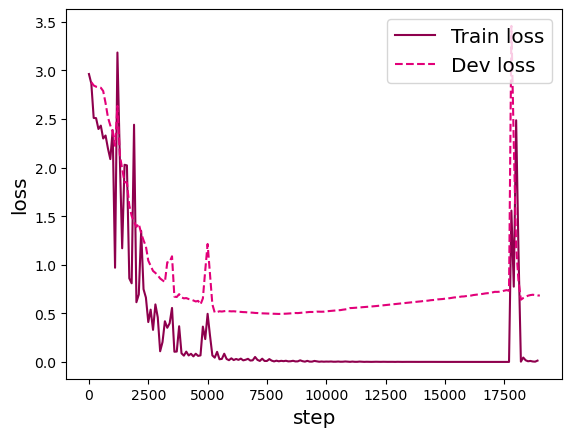

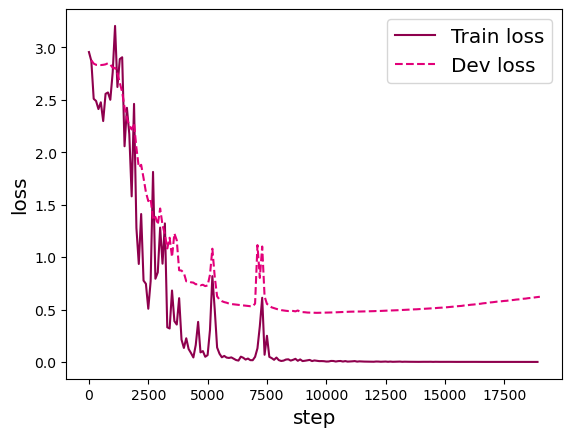

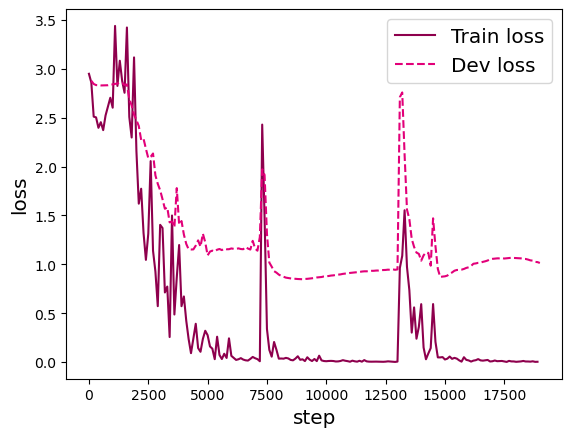

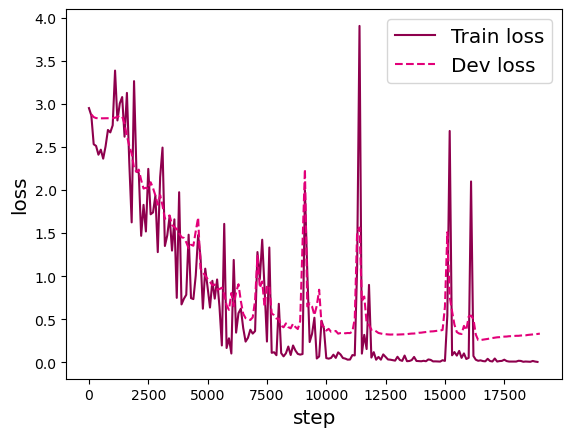

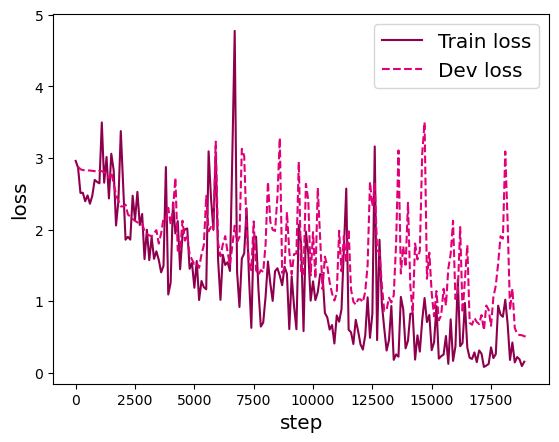

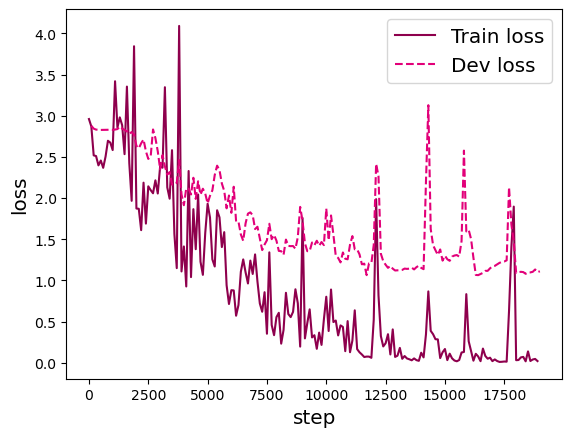

In [57]:
# 画出训练过程中的损失图
for length in lengths:
    runner = lstm_runners[length]
    fig_name = f"./images/6.11_{length}.pdf"
    plot_training_loss(runner=runner, fig_name=fig_name, sample_step=100)

In [59]:
# 模型评价
lstm_dev_scores = []
lstm_test_scores = []
for length in lengths:
    print(f"Evaluate LSTM with data length {length}.")
    runner = lstm_runners[length]

    # 加载训练过程中效果最好的模型
    model_path = os.path.join(save_dir,f"best_lstm_model_{length}.pdparams")
    runner.load_model(model_path)

    # 加载长度为length的数据
    data_path = f"./RNN_Datasets/{length}"
    train_examples, dev_examples, test_examples = load_data(data_path)
    test_set = DigitSumDataset(test_examples)
    test_loader = paddle.io.DataLoader(test_set, batch_size=batch_size)

    # 使用测试集评价模型，获取测试集上的预测准确率
    score, _ = runner.evaluate(test_loader)
    lstm_test_scores.append(score)
    lstm_dev_scores.append(max(runner.dev_scores))

for length, dev_score, test_score in zip(lengths, lstm_dev_scores, lstm_test_scores):
    print(f"[LSTM] length: {length}, dev_score: {dev_score:.5f}, test_score: {test_score:.5f}")    

Evaluate LSTM with data length 10.
Evaluate LSTM with data length 15.
Evaluate LSTM with data length 20.
Evaluate LSTM with data length 25.
Evaluate LSTM with data length 30.
Evaluate LSTM with data length 35.
[LSTM] length: 10, dev_score: 0.91000, test_score: 0.88000
[LSTM] length: 15, dev_score: 0.92000, test_score: 0.92000
[LSTM] length: 20, dev_score: 0.84000, test_score: 0.82000
[LSTM] length: 25, dev_score: 0.95000, test_score: 0.86000
[LSTM] length: 30, dev_score: 0.88000, test_score: 0.79000
[LSTM] length: 35, dev_score: 0.78000, test_score: 0.78000


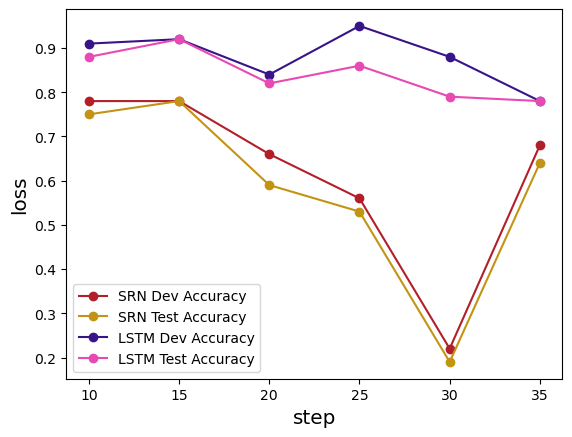

In [61]:
# 模型在不同长度的数据集上的准确率变化图

import matplotlib.pyplot as plt

plt.plot(lengths, srn_dev_scores, '-o', color='#b31f29', label='SRN Dev Accuracy')
plt.plot(lengths, srn_test_scores, '-o', color='#c39413', label='SRN Test Accuracy')
plt.plot(lengths, lstm_dev_scores, '-o', color='#381489', label='LSTM Dev Accuracy')
plt.plot(lengths, lstm_test_scores, '-o', color='#e74ab3', label='LSTM Test Accuracy')

# 绘制坐标轴和图例
plt.xlabel("step", fontsize='x-large')
plt.ylabel('loss', fontsize='x-large')
plt.legend(loc='lower left')

fig_name = './images/6.12.pdf'
plt.savefig(fig_name)
plt.show()

In [94]:
# LSTM模型门状态和单元状态的变化
import paddle.nn.functional as F
     
# 声明LSTM和相关参数
class LSTM(nn.Layer):
    def __init__(self, input_size, hidden_size, para_attr=paddle.ParamAttr(initializer=nn.initializer.XavierNormal())):
        super(LSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        # 初始化模型参数
        self.W_i = paddle.create_parameter(shape=[input_size, hidden_size], dtype="float32", attr=para_attr)
        self.W_f = paddle.create_parameter(shape=[input_size, hidden_size], dtype='float32', attr=para_attr)
        self.W_o = paddle.create_parameter(shape=[input_size, hidden_size], dtype='float32', attr=para_attr)
        self.W_a = paddle.create_parameter(shape=[input_size, hidden_size], dtype="float32", attr=para_attr)
        self.U_i = paddle.create_parameter(shape=[hidden_size, hidden_size], dtype="float32", attr=para_attr)
        self.U_f = paddle.create_parameter(shape=[hidden_size, hidden_size], dtype='float32', attr=para_attr)
        self.U_o = paddle.create_parameter(shape=[hidden_size, hidden_size], dtype="float32", attr=para_attr)
        self.U_a = paddle.create_parameter(shape=[hidden_size, hidden_size], dtype='float32', attr=para_attr)
        self.b_i = paddle.create_parameter(shape=[1, hidden_size], dtype='float32', attr=para_attr)
        self.b_f = paddle.create_parameter(shape=[1, hidden_size], dtype='float32', attr=para_attr)
        self.b_o = paddle.create_parameter(shape=[1, hidden_size], dtype="float32", attr=para_attr)
        self.b_a = paddle.create_parameter(shape=[1, hidden_size], dtype='float32', attr=para_attr)

    # 初始化状态向量和隐状态向量
    def init_state(self, batch_size):
        hidden_state = paddle.zeros(shape=[batch_size, self.hidden_size], dtype="float32")
        cell_state = paddle.zeros(shape=[batch_size, self.hidden_size], dtype='float32')
        return hidden_size, cell_state
    
    def forward(self, inputs, states=None):
        batch_size, seq_len, input_size = inputs.shape # inputs (batch_size x seq_len x input_size)

        if states is None:
            states = self.init_state(batch_size)
        hidden_size, cell_state = states

        # 定义相应的门状态和单元状态向量列表

        self.Is = []
        self.Fs = []
        self.Os = []
        self.Cs = []
        # 初始化状态向量和隐状态向量
        cell_state = paddle.zeros(shape=[batch_size, self.hidden_size], dtype='float32')
        hidden_state = paddle.zeros(shape=[batch_size, self.hidden_size], dtype='float32')

        # 执行LSTM计算，包括：隐藏门、输入门、遗忘门、候选状态向量、状态向量和隐状态向量
        for step in range(seq_len):
            input_step = inputs[:, step, :]
            I_gate = F.sigmoid(paddle.matmul(input_step, self.W_i) + paddle.matmul(hidden_state, self.U_i) + self.b_i)
            F_gate = F.sigmoid(paddle.matmul(input_step, self.W_f) + paddle.matmul(hidden_state, self.U_f) + self.b_f)
            O_gate = F.sigmoid(paddle.matmul(input_step, self.W_o) + paddle.matmul(hidden_state, self.U_o) + self.b_o)
            C_tilde = F.tanh(paddle.matmul(input_step, self.W_a) + paddle.matmul(hidden_state, self.U_a) + self.b_a)
            cell_state = F_gate*cell_state + I_gate*C_tilde
            hidden_state = O_gate*F.tanh(cell_state)

            # 存储门状态向量和单元状态向量
            self.Is.append(I_gate.numpy().copy())
            self.Fs.append(F_gate.numpy().copy())
            self.Os.append(O_gate.numpy().copy())
            self.Cs.append(cell_state.numpy().copy())

        return hidden_state

In [95]:
# 实例化模型
base_model = LSTM(input_size=input_size, hidden_size=hidden_size)

model = Model_RNN4SeqClass(model=base_model, num_digits=num_digits, input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)
# 指定优化器
optimizer = paddle.optimizer.Adam(learning_rate=lr, parameters=model.parameters())
# 定义评价指标
metric = Accuracy()
# 定义损失函数
loss_fn = paddle.nn.CrossEntropyLoss()
# 基于以上组件，重新实例化Runner
runner = RunnerV3(model=model, optimizer=optimizer, loss_fn=loss_fn, metric=metric)

length = 10
# 加载训练过程中效果最好的模型
model_path = os.path.join(save_dir, f"best_lstm_model_{length}.pdparams")
runner.load_model(model_path)

predict result: 11


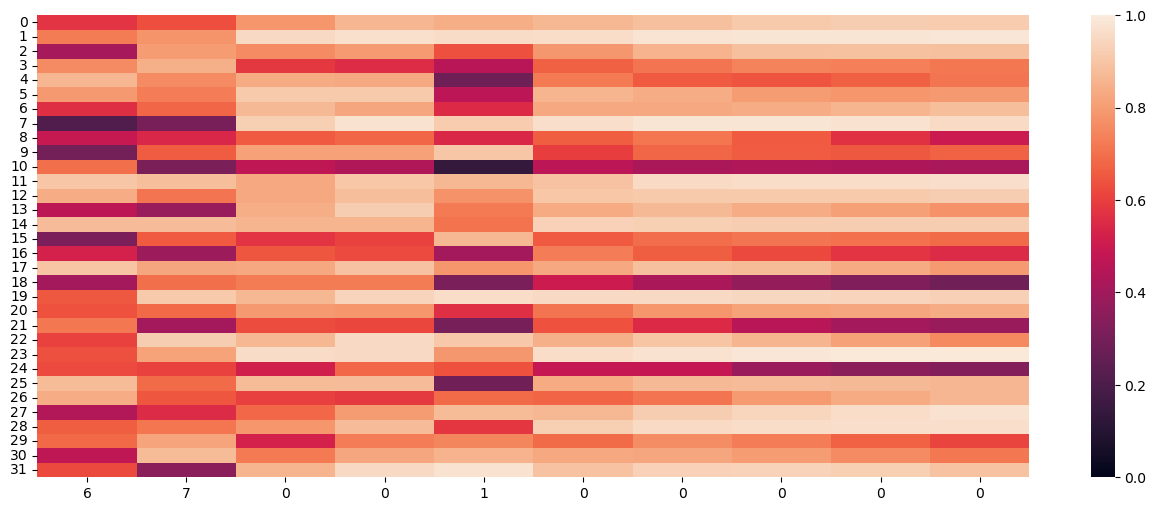

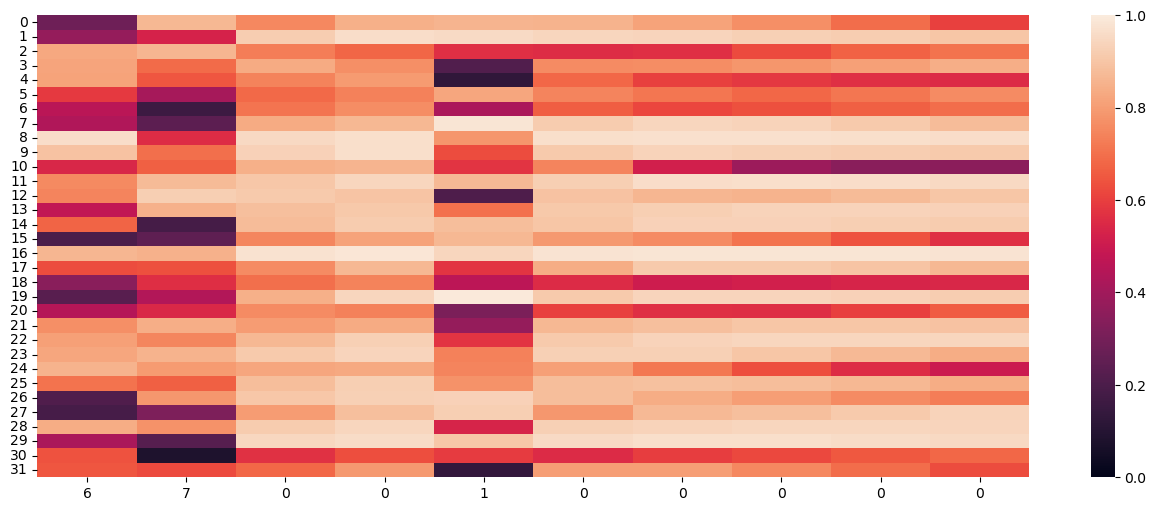

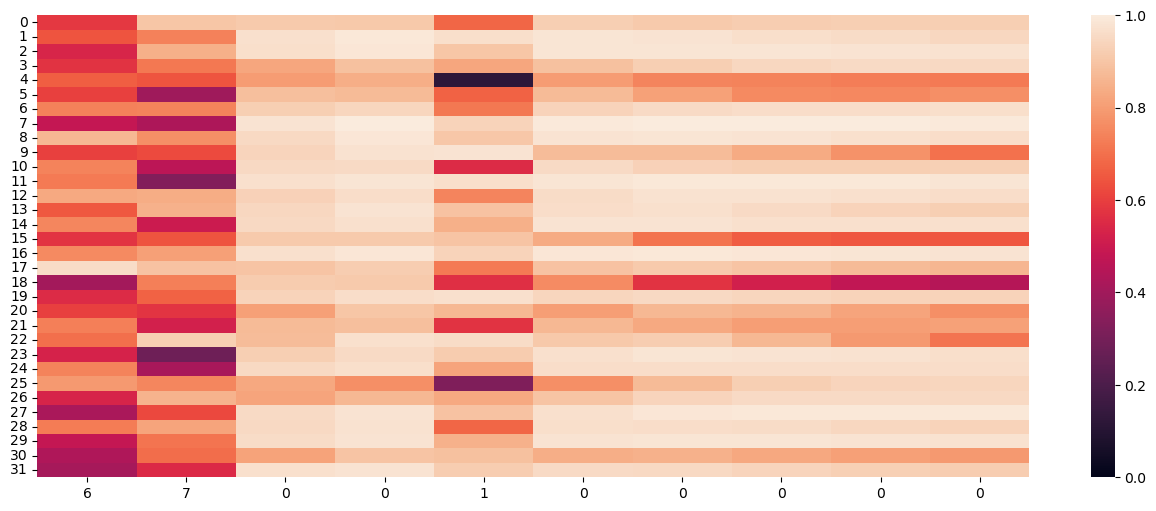

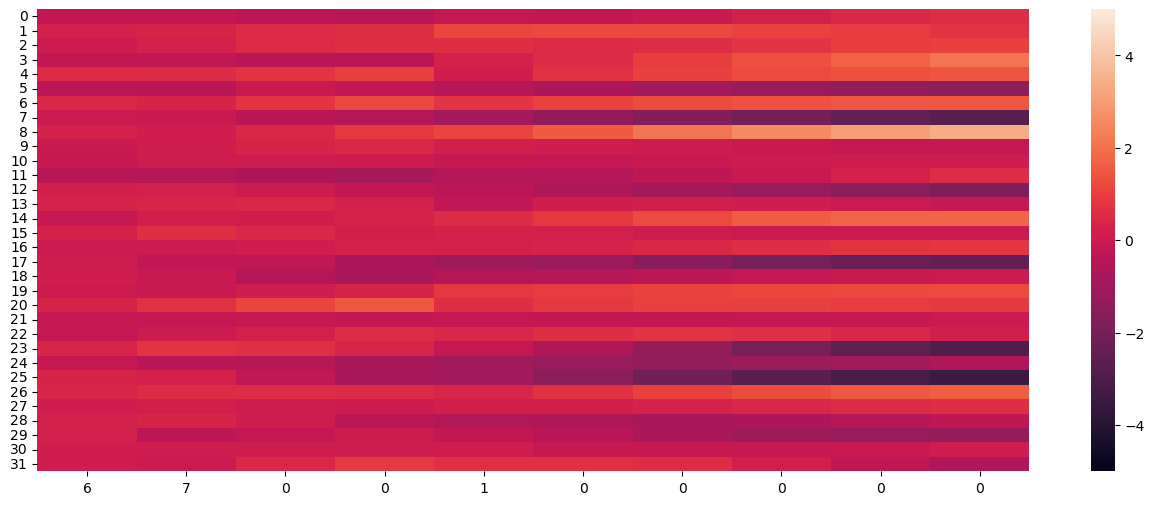

In [105]:
import seaborn as sns

def plot_tensor(inputs, tensor,  save_path, vmin=0, vmax=1):
    tensor = np.stack(tensor, axis=0)
    tensor = np.squeeze(tensor, 1).T

    plt.figure(figsize=(16,6))
    # vmin, vmax定义了色彩图的上下界
    ax = sns.heatmap(tensor, vmin=vmin, vmax=vmax) 
    ax.set_xticklabels(inputs)
    ax.figure.savefig(save_path)


# 定义模型输入
inputs = [6, 7, 0, 0, 1, 0, 0, 0, 0, 0]
X = paddle.to_tensor(inputs.copy())
X = X.unsqueeze(0)
# 进行模型预测，并获取相应的预测结果
logits = runner.predict(X)
predict_label = paddle.argmax(logits, axis=-1)
print(f"predict result: {predict_label.numpy()[0]}")

# 输入门
Is = runner.model.rnn_model.Is
plot_tensor(inputs, Is, save_path="./images/6.13_I.pdf")
# 遗忘门
Fs = runner.model.rnn_model.Fs
plot_tensor(inputs, Fs, save_path="./images/6.13_F.pdf")
# 输出门
Os = runner.model.rnn_model.Os
plot_tensor(inputs, Os, save_path="./images/6.13_O.pdf")
# 单元状态
Cs = runner.model.rnn_model.Cs
plot_tensor(inputs, Cs, save_path="./images/6.13_C.pdf", vmin=-5, vmax=5)